In [14]:
pip install seaborn


<ipython-input-27-8ca6eb2f20b9>:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  noisy_labels = noise(torch.tensor(train_set.targets), epsilon)  # Assign noise to labels


Normalized confusion matrix


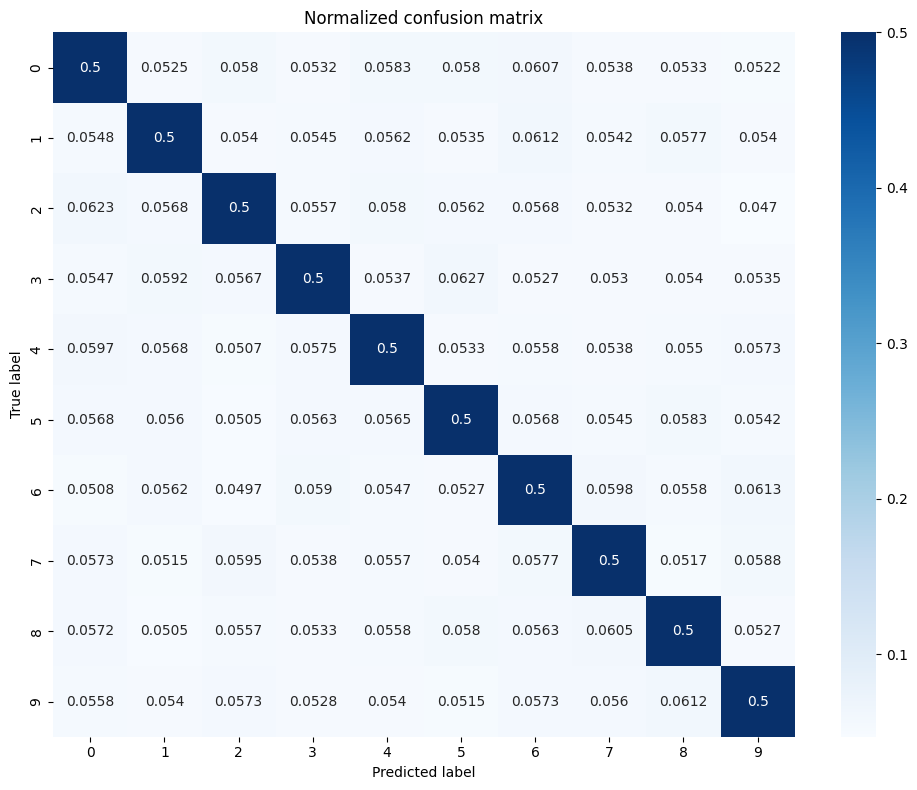

In [27]:
import torch
import numpy as np
from collections import Counter
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

import torchvision as tv
import torchvision.transforms as transforms

import torch
from collections import Counter

def noise(labels, noise_rate=0.5):
    counts = Counter(labels.tolist())

    rates = [int(noise_rate * counts[i]) for i in range(10)]

    noisy = [i.item() for i in labels]

    for idx in range(len(labels)):
        current = labels[idx]
        if rates[current] > 0:
            rates[current] -= 1
            random = torch.randint(0, 10, (1,))
            while random == labels[idx]:
                random = torch.randint(0, 10, (1,))
            noisy[idx] = random.item()

    return noisy


def plot_confusion_matrix(cm, classes, normalize=True, title='Normalized confusion matrix', cmap="Blues"):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    sns.heatmap(cm, annot=True, fmt=".3g", cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    train_set = tv.datasets.FashionMNIST(
        root='./data',
        train=True,
        download=True,
        transform=transform
    )

    epsilon = 0.5
    noisy_labels = noise(torch.tensor(train_set.targets), epsilon)  # Assign noise to labels

    # Calculate the confusion matrix using the noisy labels
    cm = confusion_matrix(train_set.targets, noisy_labels, normalize='true')

    plt.figure(figsize=(10, 8))
    plot_confusion_matrix(cm, classes=[str(i) for i in range(10)])


100%|██████████| 26421880/26421880 [00:01<00:00, 16700880.33it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 327497.96it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5434602.31it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15601356.21it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



<ipython-input-1-eca75f8bd8eb>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  noisy_labels = noise(torch.tensor(train_set.targets), epsilon)


Data loaded successfully...


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[epoch 1, iter   200] loss: 1.943
[epoch 1, iter   400] loss: 1.800
[epoch 1, iter   600] loss: 1.784
[epoch 1, iter   800] loss: 1.756


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch 1: train_acc 50.597, test_acc 82.000
[epoch 2, iter   200] loss: 1.734
[epoch 2, iter   400] loss: 1.734
[epoch 2, iter   600] loss: 1.721
[epoch 2, iter   800] loss: 1.705
epoch 2: train_acc 52.610, test_acc 85.380
[epoch 3, iter   200] loss: 1.705
[epoch 3, iter   400] loss: 1.703
[epoch 3, iter   600] loss: 1.695
[epoch 3, iter   800] loss: 1.697
epoch 3: train_acc 53.138, test_acc 86.100
[epoch 4, iter   200] loss: 1.673
[epoch 4, iter   400] loss: 1.672
[epoch 4, iter   600] loss: 1.697
[epoch 4, iter   800] loss: 1.679
epoch 4: train_acc 53.335, test_acc 86.370
[epoch 5, iter   200] loss: 1.649
[epoch 5, iter   400] loss: 1.682
[epoch 5, iter   600] loss: 1.672
[epoch 5, iter   800] loss: 1.657
epoch 5: train_acc 54.442, test_acc 87.890
[epoch 6, iter   200] loss: 1.633
[epoch 6, iter   400] loss: 1.668
[epoch 6, iter   600] loss: 1.664
[epoch 6, iter   800] loss: 1.664
epoch 6: train_acc 54.463, test_acc 87.680
[epoch 7, iter   200] loss: 1.657
[epoch 7, iter   400] loss: 

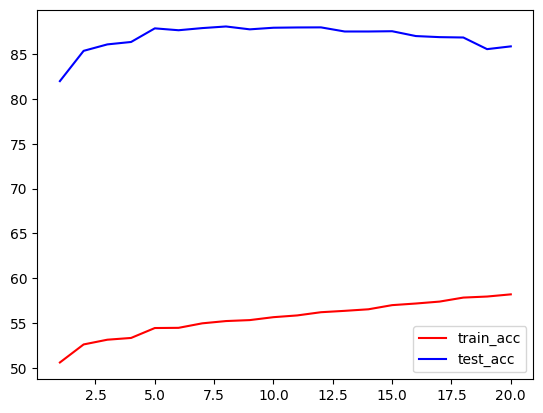

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision as tv
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import math
import os
from collections import Counter
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools

train_batch_size = 64
test_batch_size = 1000

class Net(nn.Module):
   def __init__(self):
       super(Net, self).__init__()
       self.conv1 = nn.Conv2d(1, 6, 5, stride=1, padding=2)
       self.conv2 = nn.Conv2d(6, 16, 5, stride=1, padding=0)
       self.fc1 = nn.Linear(16*5*5, 120)
       self.fc2 = nn.Linear(120, 84)
       self.fc3 = nn.Linear(84, 10)  # Change from 10 to 10 for Fashion-MNIST
   def forward(self, x):
       x = F.max_pool2d(F.relu(self.conv1(x)), 2)
       x = F.max_pool2d(F.relu(self.conv2(x)), 2)
       x = x.view(-1, self.num_flat_features(x))
       x = F.relu(self.fc1(x))
       x = F.relu(self.fc2(x))
       x = self.fc3(x)
       return x
   def num_flat_features(self, x):
       x_size = x.size()[1:]
       num = 1
       for n in x_size:
           num *= n
       return num

def noise(labels, noise_rate=0.4):
    counts = Counter(labels.tolist())
    rates = [int(noise_rate * counts[i]) for i in range(10)]
    noisy = [i.item() for i in labels]

    for idx in range(len(labels)):
        current = labels[idx]
        if rates[current] > 0:
            rates[current] -= 1
            random = torch.randint(0, 10, (1,))
            while random == labels[idx]:
                random = torch.randint(0, 10, (1,))
            noisy[idx] = random.item()

    return noisy

def load_data(noise_rate=0.4):
   transform = transforms.Compose([
       transforms.ToTensor(),
       transforms.Normalize((0.5,), (0.5,))
   ])
   train_set = tv.datasets.FashionMNIST(
       root='./data',
       train=True,
       download=True,
       transform=transform
   )
   epsilon = noise_rate
   noisy_labels = noise(torch.tensor(train_set.targets), epsilon)
   train_set.targets = torch.tensor(noisy_labels)

   train_loader = torch.utils.data.DataLoader(
       train_set,
       batch_size=train_batch_size,
       shuffle=True,
       num_workers=2
   )
   test_set = tv.datasets.FashionMNIST(
       root='./data',
       train=False,
       download=True,
       transform=transform
   )
   test_loader = torch.utils.data.DataLoader(
       test_set,
       batch_size=test_batch_size,
       shuffle=False,
       num_workers=2
   )
   print("Data loaded successfully...")
   return train_loader, test_loader

def accuracy(model, x):
   with torch.no_grad():
       correct = 0
       total = 0
       for data in x:
           images, labels = data
           outputs = model(images)
           _, predicted = torch.max(outputs.data, 1)
           total += labels.size(0)
           correct += (predicted == labels).sum().item()

       return (100 * correct / total)

def train(train_loader, test_loader, model, criterion, optimizer, epoch):
   model.train()
   running_loss = 0
   for i, data in enumerate(train_loader, 0):
       inputs, labels = data
       optimizer.zero_grad()
       outputs = model(inputs)
       loss = criterion(outputs, labels)
       loss.backward()
       optimizer.step()

       running_loss += loss.item()
       if i % 200 == 199:
           print("[epoch %d, iter %5d] loss: %.3f" % (epoch+1, i+1, running_loss / 200))
           running_loss = 0.0
   train_acc = accuracy(model, train_loader)
   test_acc = accuracy(model, test_loader)
   print("epoch %d: train_acc %.3f, test_acc %.3f" % (epoch+1, train_acc, test_acc))
   return train_acc, test_acc

def display(train_acc, test_acc):
   fig, ax = plt.subplots()
   ax.plot(range(1, len(train_acc) + 1), train_acc, color='r', label='train_acc')
   ax.plot(range(1, len(test_acc) + 1), test_acc, color='b', label='test_acc')
   ax.legend(loc='lower right')
   plt.show()

if __name__ == '__main__':
   # input Fashion-MNIST
   train_loader, test_loader = load_data()
   # new model
   net = Net()

   # training
   learning_rate = 0.001
   momentum = 0.9
   max_epoch = 20
   criterion = nn.CrossEntropyLoss()
   optimizer = optim.Adam(net.parameters(), lr=learning_rate)

   train_acc = []
   test_acc = []
   for epoch in range(max_epoch):
       train_acc_t, test_acc_t = train(train_loader, test_loader, net, criterion, optimizer, epoch)
       train_acc.append(train_acc_t)
       test_acc.append(test_acc_t)

   display(train_acc, test_acc)


100%|██████████| 170498071/170498071 [00:03<00:00, 51794461.35it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Data loaded successfully...


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[epoch 1, iter   200] loss: 1.967
[epoch 1, iter   400] loss: 1.662
[epoch 1, iter   600] loss: 1.586
epoch 1: train_acc 45.484, test_acc 45.120
[epoch 2, iter   200] loss: 1.460
[epoch 2, iter   400] loss: 1.439
[epoch 2, iter   600] loss: 1.391
epoch 2: train_acc 52.120, test_acc 52.340
[epoch 3, iter   200] loss: 1.334
[epoch 3, iter   400] loss: 1.312
[epoch 3, iter   600] loss: 1.279
epoch 3: train_acc 55.954, test_acc 55.470
[epoch 4, iter   200] loss: 1.236
[epoch 4, iter   400] loss: 1.202
[epoch 4, iter   600] loss: 1.216
epoch 4: train_acc 59.458, test_acc 58.130
[epoch 5, iter   200] loss: 1.165
[epoch 5, iter   400] loss: 1.126
[epoch 5, iter   600] loss: 1.143
epoch 5: train_acc 61.674, test_acc 59.880
[epoch 6, iter   200] loss: 1.100
[epoch 6, iter   400] loss: 1.102
[epoch 6, iter   600] loss: 1.079
epoch 6: train_acc 63.448, test_acc 61.020
[epoch 7, iter   200] loss: 1.051
[epoch 7, iter   400] loss: 1.042
[epoch 7, iter   600] loss: 1.025
epoch 7: train_acc 65.402, t

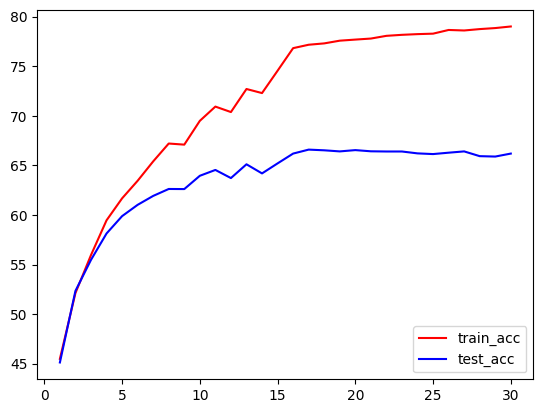

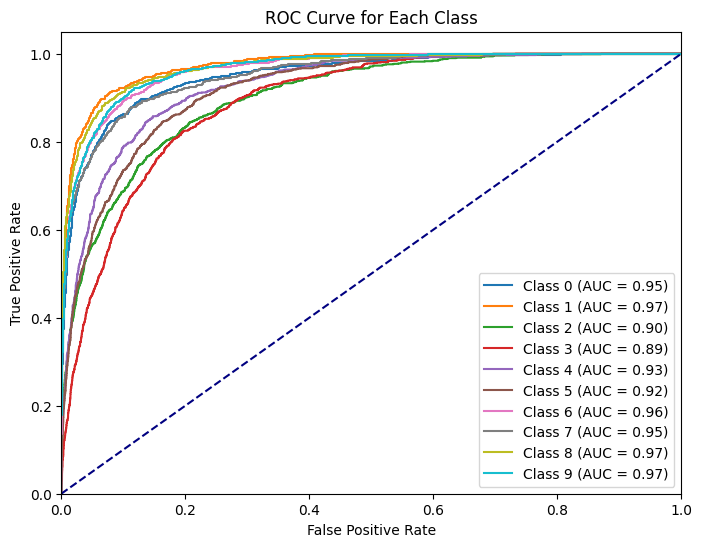

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision as tv
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import math
import os
from sklearn.metrics import roc_curve, auc

from torch.optim.lr_scheduler import StepLR

train_batch_size = 64
test_batch_size = 1000

class Net(nn.Module):
   def __init__(self):
       super(Net, self).__init__()
       self.conv1 = nn.Conv2d(3, 6, 5)  # Adjust input channels to 3 for CIFAR-10
       self.conv2 = nn.Conv2d(6, 16, 5)
       self.fc1 = nn.Linear(16 * 5 * 5, 120)
       self.fc2 = nn.Linear(120, 84)
       self.fc3 = nn.Linear(84, 10)  # Adjust output to 10 for CIFAR-10

   def forward(self, x):
       x = F.max_pool2d(F.relu(self.conv1(x)), 2)
       x = F.max_pool2d(F.relu(self.conv2(x)), 2)
       x = x.view(-1, self.num_flat_features(x))
       x = F.relu(self.fc1(x))
       x = F.relu(self.fc2(x))
       x = self.fc3(x)
       return x

   def num_flat_features(self, x):
       size = x.size()[1:]
       num_features = 1
       for s in size:
           num_features *= s
       return num_features

def load_data():
   transform = transforms.Compose([
       transforms.Resize((32, 32)),  # Resize images to 32x32 for CIFAR-10
       transforms.ToTensor(),
       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Adjust normalization for CIFAR-10
   ])
   train_set = tv.datasets.CIFAR10(
       root='./data',
       train=True,
       download=True,
       transform=transform
   )
   train_loader = torch.utils.data.DataLoader(
       train_set,
       batch_size=train_batch_size,
       shuffle=True,
       num_workers=2
   )
   test_set = tv.datasets.CIFAR10(
       root='./data',
       train=False,
       download=True,
       transform=transform
   )
   test_loader = torch.utils.data.DataLoader(
       test_set,
       batch_size=test_batch_size,
       shuffle=False,
       num_workers=2
   )
   print("Data loaded successfully...")
   return train_loader, test_loader

def accuracy(model, data_loader):
   with torch.no_grad():
       correct = 0
       total = 0
       for data in data_loader:
           images, labels = data
           outputs = model(images)
           _, predicted = torch.max(outputs.data, 1)
           total += labels.size(0)
           correct += (predicted == labels).sum().item()

   return (100 * correct / total)

def train(train_loader, test_loader, model, criterion, optimizer, scheduler, max_epoch):
   train_acc = []
   test_acc = []
   for epoch in range(max_epoch):
       model.train()
       running_loss = 0
       for i, data in enumerate(train_loader, 0):
           inputs, labels = data
           optimizer.zero_grad()
           outputs = model(inputs)
           loss = criterion(outputs, labels)
           loss.backward()
           optimizer.step()

           running_loss += loss.item()
           if i % 200 == 199:
               print("[epoch %d, iter %5d] loss: %.3f" % (epoch+1, i+1, running_loss / 200))
               running_loss = 0.0

       # Update learning rate
       scheduler.step()

       train_acc_epoch = accuracy(model, train_loader)
       test_acc_epoch = accuracy(model, test_loader)
       train_acc.append(train_acc_epoch)
       test_acc.append(test_acc_epoch)
       print("epoch %d: train_acc %.3f, test_acc %.3f" % (epoch+1, train_acc_epoch, test_acc_epoch))

   return train_acc, test_acc

def display(train_acc, test_acc):
   fig, ax = plt.subplots()
   ax.plot(range(1, len(train_acc) + 1), train_acc, color='r', label='train_acc')
   ax.plot(range(1, len(test_acc) + 1), test_acc, color='b', label='test_acc')
   ax.legend(loc='lower right')
   plt.show()

def plot_roc_curve(model, test_loader):
    model.eval()
    y_true = []
    y_scores = []

    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            probabilities = torch.softmax(outputs, dim=1)
            y_true.extend(labels.numpy())
            y_scores.extend(probabilities.numpy())

    y_true = np.array(y_true)
    y_scores = np.array(y_scores)

    num_classes = y_scores.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Each Class')
    plt.legend(loc="lower right")
    plt.show()

if __name__ == '__main__':
    # Input CIFAR-10
    train_loader, test_loader = load_data()
    # New model
    net = Net()

    # Training
    learning_rate = 0.0008
    max_epoch = 30
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate, betas=(0.9, 0.999))

    # Learning rate scheduler
    step_size = 15
    gamma = 0.1
    scheduler = StepLR(optimizer, step_size=step_size, gamma=gamma)

    train_acc, test_acc = train(train_loader, test_loader, net, criterion, optimizer, scheduler, max_epoch)

    display(train_acc, test_acc)

    plot_roc_curve(net, test_loader)


Files already downloaded and verified
Files already downloaded and verified
Data loaded successfully...


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[epoch 1, iter   200] loss: 1.949
[epoch 1, iter   400] loss: 1.663
[epoch 1, iter   600] loss: 1.582
epoch 1: train_acc 46.418, test_acc 46.410
[epoch 2, iter   200] loss: 1.470
[epoch 2, iter   400] loss: 1.422
[epoch 2, iter   600] loss: 1.402
epoch 2: train_acc 51.536, test_acc 50.740
[epoch 3, iter   200] loss: 1.336
[epoch 3, iter   400] loss: 1.305
[epoch 3, iter   600] loss: 1.288
epoch 3: train_acc 56.040, test_acc 53.900
[epoch 4, iter   200] loss: 1.222
[epoch 4, iter   400] loss: 1.240
[epoch 4, iter   600] loss: 1.200
epoch 4: train_acc 59.994, test_acc 57.060
[epoch 5, iter   200] loss: 1.153
[epoch 5, iter   400] loss: 1.147
[epoch 5, iter   600] loss: 1.124
epoch 5: train_acc 61.674, test_acc 59.150
[epoch 6, iter   200] loss: 1.076
[epoch 6, iter   400] loss: 1.078
[epoch 6, iter   600] loss: 1.090
epoch 6: train_acc 63.826, test_acc 60.820
[epoch 7, iter   200] loss: 1.035
[epoch 7, iter   400] loss: 1.019
[epoch 7, iter   600] loss: 1.019
epoch 7: train_acc 65.526, t

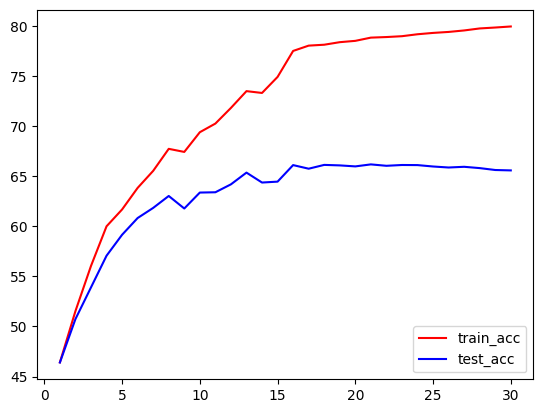

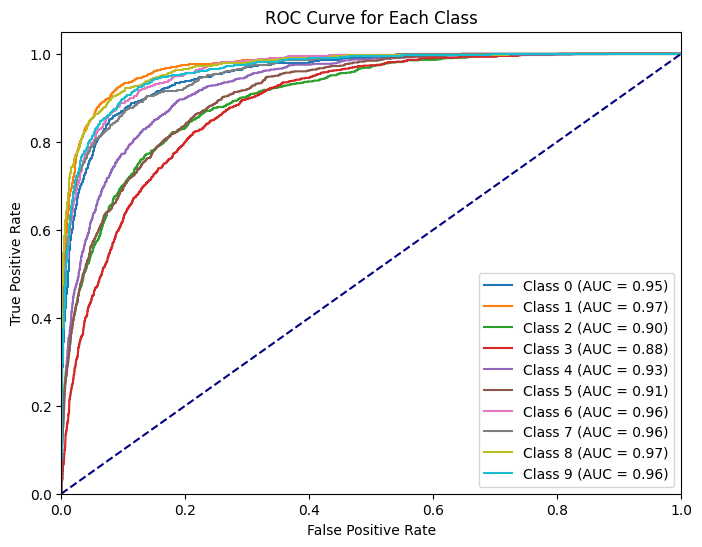

Weighted Sum of AUC: 9.40329322222222


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision as tv
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import math
import os
from sklearn.metrics import roc_curve, auc

from torch.optim.lr_scheduler import StepLR

train_batch_size = 64
test_batch_size = 1000

class Net(nn.Module):
   def __init__(self):
       super(Net, self).__init__()
       self.conv1 = nn.Conv2d(3, 6, 5)  # Adjust input channels to 3 for CIFAR-10
       self.conv2 = nn.Conv2d(6, 16, 5)
       self.fc1 = nn.Linear(16 * 5 * 5, 120)
       self.fc2 = nn.Linear(120, 84)
       self.fc3 = nn.Linear(84, 10)  # Adjust output to 10 for CIFAR-10

   def forward(self, x):
       x = F.max_pool2d(F.relu(self.conv1(x)), 2)
       x = F.max_pool2d(F.relu(self.conv2(x)), 2)
       x = x.view(-1, self.num_flat_features(x))
       x = F.relu(self.fc1(x))
       x = F.relu(self.fc2(x))
       x = self.fc3(x)
       return x

   def num_flat_features(self, x):
       size = x.size()[1:]
       num_features = 1
       for s in size:
           num_features *= s
       return num_features

def load_data():
   transform = transforms.Compose([
       transforms.Resize((32, 32)),  # Resize images to 32x32 for CIFAR-10
       transforms.ToTensor(),
       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Adjust normalization for CIFAR-10
   ])
   train_set = tv.datasets.CIFAR10(
       root='./data',
       train=True,
       download=True,
       transform=transform
   )
   train_loader = torch.utils.data.DataLoader(
       train_set,
       batch_size=train_batch_size,
       shuffle=True,
       num_workers=2
   )
   test_set = tv.datasets.CIFAR10(
       root='./data',
       train=False,
       download=True,
       transform=transform
   )
   test_loader = torch.utils.data.DataLoader(
       test_set,
       batch_size=test_batch_size,
       shuffle=False,
       num_workers=2
   )
   print("Data loaded successfully...")
   return train_loader, test_loader

def accuracy(model, data_loader):
   with torch.no_grad():
       correct = 0
       total = 0
       for data in data_loader:
           images, labels = data
           outputs = model(images)
           _, predicted = torch.max(outputs.data, 1)
           total += labels.size(0)
           correct += (predicted == labels).sum().item()

   return (100 * correct / total)

def train(train_loader, test_loader, model, criterion, optimizer, scheduler, max_epoch):
   train_acc = []
   test_acc = []
   for epoch in range(max_epoch):
       model.train()
       running_loss = 0
       for i, data in enumerate(train_loader, 0):
           inputs, labels = data
           optimizer.zero_grad()
           outputs = model(inputs)
           loss = criterion(outputs, labels)
           loss.backward()
           optimizer.step()

           running_loss += loss.item()
           if i % 200 == 199:
               print("[epoch %d, iter %5d] loss: %.3f" % (epoch+1, i+1, running_loss / 200))
               running_loss = 0.0

       # Update learning rate
       scheduler.step()

       train_acc_epoch = accuracy(model, train_loader)
       test_acc_epoch = accuracy(model, test_loader)
       train_acc.append(train_acc_epoch)
       test_acc.append(test_acc_epoch)
       print("epoch %d: train_acc %.3f, test_acc %.3f" % (epoch+1, train_acc_epoch, test_acc_epoch))

   return train_acc, test_acc

def display(train_acc, test_acc):
   fig, ax = plt.subplots()
   ax.plot(range(1, len(train_acc) + 1), train_acc, color='r', label='train_acc')
   ax.plot(range(1, len(test_acc) + 1), test_acc, color='b', label='test_acc')
   ax.legend(loc='lower right')
   plt.show()

def plot_roc_curve(model, test_loader):
    model.eval()
    y_true = []
    y_scores = []

    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            probabilities = torch.softmax(outputs, dim=1)
            y_true.extend(labels.numpy())
            y_scores.extend(probabilities.numpy())

    y_true = np.array(y_true)
    y_scores = np.array(y_scores)

    num_classes = y_scores.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Each Class')
    plt.legend(loc="lower right")
    plt.show()

    return roc_auc

def compute_auc_weighted_sum(roc_auc):
    weighted_sum = 0
    for class_idx, auc_value in roc_auc.items():
        weighted_sum += auc_value
    return weighted_sum

if __name__ == '__main__':
    # Input CIFAR-10
    train_loader, test_loader = load_data()
    # New model
    net = Net()

    # Training
    learning_rate = 0.0008
    max_epoch = 30
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate, betas=(0.9, 0.999))

    # Learning rate scheduler
    step_size = 15
    gamma = 0.1
    scheduler = StepLR(optimizer, step_size=step_size, gamma=gamma)

    train_acc, test_acc = train(train_loader, test_loader, net, criterion, optimizer, scheduler, max_epoch)

    display(train_acc, test_acc)

    roc_auc = plot_roc_curve(net, test_loader)

    weighted_sum_auc = compute_auc_weighted_sum(roc_auc)
    print("Weighted Sum of AUC:", weighted_sum_auc)


100%|██████████| 26421880/26421880 [00:02<00:00, 12822223.08it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 230894.26it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 4310105.94it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4984366.80it/s]
<ipython-input-3-4d74d3c09673>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  noisy_labels = noise(torch.tensor(train_set.targets), epsilon)


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Data loaded successfully...


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[epoch 1, iter   200] loss: 1.591
[epoch 1, iter   400] loss: 1.343
[epoch 1, iter   600] loss: 1.290
[epoch 1, iter   800] loss: 1.257


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch 1: train_acc 67.882, test_acc 83.290
[epoch 2, iter   200] loss: 1.232
[epoch 2, iter   400] loss: 1.221
[epoch 2, iter   600] loss: 1.193
[epoch 2, iter   800] loss: 1.190
epoch 2: train_acc 70.545, test_acc 86.580
[epoch 3, iter   200] loss: 1.185
[epoch 3, iter   400] loss: 1.159
[epoch 3, iter   600] loss: 1.150
[epoch 3, iter   800] loss: 1.156
epoch 3: train_acc 70.958, test_acc 87.030
[epoch 4, iter   200] loss: 1.146
[epoch 4, iter   400] loss: 1.140
[epoch 4, iter   600] loss: 1.122
[epoch 4, iter   800] loss: 1.156
epoch 4: train_acc 71.612, test_acc 88.000
[epoch 5, iter   200] loss: 1.108
[epoch 5, iter   400] loss: 1.112
[epoch 5, iter   600] loss: 1.150
[epoch 5, iter   800] loss: 1.122
epoch 5: train_acc 72.507, test_acc 88.860
[epoch 6, iter   200] loss: 1.123
[epoch 6, iter   400] loss: 1.107
[epoch 6, iter   600] loss: 1.117
[epoch 6, iter   800] loss: 1.103
epoch 6: train_acc 72.420, test_acc 88.470
[epoch 7, iter   200] loss: 1.093
[epoch 7, iter   400] loss: 

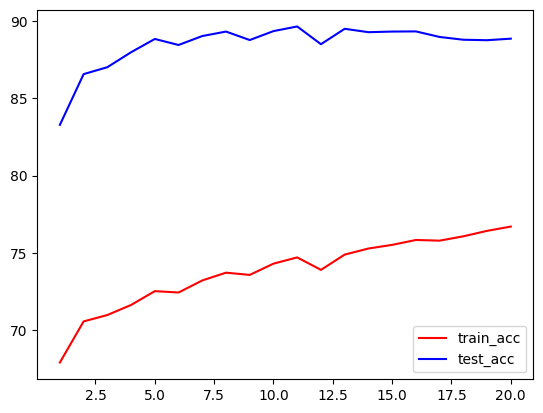

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision as tv
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import math
import os
from collections import Counter
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools

train_batch_size = 64
test_batch_size = 1000

class Net(nn.Module):
   def __init__(self):
       super(Net, self).__init__()
       self.conv1 = nn.Conv2d(1, 6, 5, stride=1, padding=2)
       self.conv2 = nn.Conv2d(6, 16, 5, stride=1, padding=0)
       self.fc1 = nn.Linear(16*5*5, 120)
       self.fc2 = nn.Linear(120, 84)
       self.fc3 = nn.Linear(84, 10)  # Change from 10 to 10 for Fashion-MNIST
   def forward(self, x):
       x = F.max_pool2d(F.relu(self.conv1(x)), 2)
       x = F.max_pool2d(F.relu(self.conv2(x)), 2)
       x = x.view(-1, self.num_flat_features(x))
       x = F.relu(self.fc1(x))
       x = F.relu(self.fc2(x))
       x = self.fc3(x)
       return x
   def num_flat_features(self, x):
       x_size = x.size()[1:]
       num = 1
       for n in x_size:
           num *= n
       return num

def noise(labels, noise_rate=0.2):
    counts = Counter(labels.tolist())
    rates = [int(noise_rate * counts[i]) for i in range(10)]
    noisy = [i.item() for i in labels]

    for idx in range(len(labels)):
        current = labels[idx]
        if rates[current] > 0:
            rates[current] -= 1
            random = torch.randint(0, 10, (1,))
            while random == labels[idx]:
                random = torch.randint(0, 10, (1,))
            noisy[idx] = random.item()

    return noisy

def load_data(noise_rate=0.2):
   transform = transforms.Compose([
       transforms.ToTensor(),
       transforms.Normalize((0.5,), (0.5,))
   ])
   train_set = tv.datasets.FashionMNIST(
       root='./data',
       train=True,
       download=True,
       transform=transform
   )
   epsilon = noise_rate
   noisy_labels = noise(torch.tensor(train_set.targets), epsilon)
   train_set.targets = torch.tensor(noisy_labels)

   train_loader = torch.utils.data.DataLoader(
       train_set,
       batch_size=train_batch_size,
       shuffle=True,
       num_workers=2
   )
   test_set = tv.datasets.FashionMNIST(
       root='./data',
       train=False,
       download=True,
       transform=transform
   )
   test_loader = torch.utils.data.DataLoader(
       test_set,
       batch_size=test_batch_size,
       shuffle=False,
       num_workers=2
   )
   print("Data loaded successfully...")
   return train_loader, test_loader

def accuracy(model, x):
   with torch.no_grad():
       correct = 0
       total = 0
       for data in x:
           images, labels = data
           outputs = model(images)
           _, predicted = torch.max(outputs.data, 1)
           total += labels.size(0)
           correct += (predicted == labels).sum().item()

       return (100 * correct / total)

def train(train_loader, test_loader, model, criterion, optimizer, epoch):
   model.train()
   running_loss = 0
   for i, data in enumerate(train_loader, 0):
       inputs, labels = data
       optimizer.zero_grad()
       outputs = model(inputs)
       loss = criterion(outputs, labels)
       loss.backward()
       optimizer.step()

       running_loss += loss.item()
       if i % 200 == 199:
           print("[epoch %d, iter %5d] loss: %.3f" % (epoch+1, i+1, running_loss / 200))
           running_loss = 0.0
   train_acc = accuracy(model, train_loader)
   test_acc = accuracy(model, test_loader)
   print("epoch %d: train_acc %.3f, test_acc %.3f" % (epoch+1, train_acc, test_acc))
   return train_acc, test_acc

def display(train_acc, test_acc):
   fig, ax = plt.subplots()
   ax.plot(range(1, len(train_acc) + 1), train_acc, color='r', label='train_acc')
   ax.plot(range(1, len(test_acc) + 1), test_acc, color='b', label='test_acc')
   ax.legend(loc='lower right')
   plt.show()

if __name__ == '__main__':
   # input Fashion-MNIST
   train_loader, test_loader = load_data()
   # new model
   net = Net()

   # training
   learning_rate = 0.001
   momentum = 0.9
   max_epoch = 20
   criterion = nn.CrossEntropyLoss()
   optimizer = optim.Adam(net.parameters(), lr=learning_rate)

   train_acc = []
   test_acc = []
   for epoch in range(max_epoch):
       train_acc_t, test_acc_t = train(train_loader, test_loader, net, criterion, optimizer, epoch)
       train_acc.append(train_acc_t)
       test_acc.append(test_acc_t)

   display(train_acc, test_acc)


<ipython-input-4-705d09916e1c>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  noisy_labels = noise(torch.tensor(train_set.targets), epsilon)


Data loaded successfully...
[epoch 1, iter   200] loss: 2.193
[epoch 1, iter   400] loss: 2.116
[epoch 1, iter   600] loss: 2.107
[epoch 1, iter   800] loss: 2.101
epoch 1: train_acc 33.575, test_acc 79.580
[epoch 2, iter   200] loss: 2.077
[epoch 2, iter   400] loss: 2.078
[epoch 2, iter   600] loss: 2.078
[epoch 2, iter   800] loss: 2.074
epoch 2: train_acc 34.465, test_acc 82.220
[epoch 3, iter   200] loss: 2.063
[epoch 3, iter   400] loss: 2.065
[epoch 3, iter   600] loss: 2.058
[epoch 3, iter   800] loss: 2.073
epoch 3: train_acc 35.213, test_acc 83.480
[epoch 4, iter   200] loss: 2.052
[epoch 4, iter   400] loss: 2.066
[epoch 4, iter   600] loss: 2.053
[epoch 4, iter   800] loss: 2.051
epoch 4: train_acc 35.795, test_acc 85.070
[epoch 5, iter   200] loss: 2.044
[epoch 5, iter   400] loss: 2.050
[epoch 5, iter   600] loss: 2.044
[epoch 5, iter   800] loss: 2.052
epoch 5: train_acc 35.535, test_acc 84.000
[epoch 6, iter   200] loss: 2.044
[epoch 6, iter   400] loss: 2.031
[epoch 6,

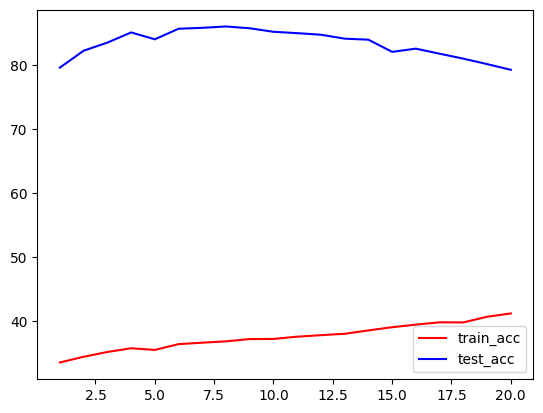

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision as tv
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import math
import os
from collections import Counter
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools

train_batch_size = 64
test_batch_size = 1000

class Net(nn.Module):
   def __init__(self):
       super(Net, self).__init__()
       self.conv1 = nn.Conv2d(1, 6, 5, stride=1, padding=2)
       self.conv2 = nn.Conv2d(6, 16, 5, stride=1, padding=0)
       self.fc1 = nn.Linear(16*5*5, 120)
       self.fc2 = nn.Linear(120, 84)
       self.fc3 = nn.Linear(84, 10)  # Change from 10 to 10 for Fashion-MNIST
   def forward(self, x):
       x = F.max_pool2d(F.relu(self.conv1(x)), 2)
       x = F.max_pool2d(F.relu(self.conv2(x)), 2)
       x = x.view(-1, self.num_flat_features(x))
       x = F.relu(self.fc1(x))
       x = F.relu(self.fc2(x))
       x = self.fc3(x)
       return x
   def num_flat_features(self, x):
       x_size = x.size()[1:]
       num = 1
       for n in x_size:
           num *= n
       return num

def noise(labels, noise_rate=0.6):
    counts = Counter(labels.tolist())
    rates = [int(noise_rate * counts[i]) for i in range(10)]
    noisy = [i.item() for i in labels]

    for idx in range(len(labels)):
        current = labels[idx]
        if rates[current] > 0:
            rates[current] -= 1
            random = torch.randint(0, 10, (1,))
            while random == labels[idx]:
                random = torch.randint(0, 10, (1,))
            noisy[idx] = random.item()

    return noisy

def load_data(noise_rate=0.6):
   transform = transforms.Compose([
       transforms.ToTensor(),
       transforms.Normalize((0.5,), (0.5,))
   ])
   train_set = tv.datasets.FashionMNIST(
       root='./data',
       train=True,
       download=True,
       transform=transform
   )
   epsilon = noise_rate
   noisy_labels = noise(torch.tensor(train_set.targets), epsilon)
   train_set.targets = torch.tensor(noisy_labels)

   train_loader = torch.utils.data.DataLoader(
       train_set,
       batch_size=train_batch_size,
       shuffle=True,
       num_workers=2
   )
   test_set = tv.datasets.FashionMNIST(
       root='./data',
       train=False,
       download=True,
       transform=transform
   )
   test_loader = torch.utils.data.DataLoader(
       test_set,
       batch_size=test_batch_size,
       shuffle=False,
       num_workers=2
   )
   print("Data loaded successfully...")
   return train_loader, test_loader

def accuracy(model, x):
   with torch.no_grad():
       correct = 0
       total = 0
       for data in x:
           images, labels = data
           outputs = model(images)
           _, predicted = torch.max(outputs.data, 1)
           total += labels.size(0)
           correct += (predicted == labels).sum().item()

       return (100 * correct / total)

def train(train_loader, test_loader, model, criterion, optimizer, epoch):
   model.train()
   running_loss = 0
   for i, data in enumerate(train_loader, 0):
       inputs, labels = data
       optimizer.zero_grad()
       outputs = model(inputs)
       loss = criterion(outputs, labels)
       loss.backward()
       optimizer.step()

       running_loss += loss.item()
       if i % 200 == 199:
           print("[epoch %d, iter %5d] loss: %.3f" % (epoch+1, i+1, running_loss / 200))
           running_loss = 0.0
   train_acc = accuracy(model, train_loader)
   test_acc = accuracy(model, test_loader)
   print("epoch %d: train_acc %.3f, test_acc %.3f" % (epoch+1, train_acc, test_acc))
   return train_acc, test_acc

def display(train_acc, test_acc):
   fig, ax = plt.subplots()
   ax.plot(range(1, len(train_acc) + 1), train_acc, color='r', label='train_acc')
   ax.plot(range(1, len(test_acc) + 1), test_acc, color='b', label='test_acc')
   ax.legend(loc='lower right')
   plt.show()

if __name__ == '__main__':
   # input Fashion-MNIST
   train_loader, test_loader = load_data()
   # new model
   net = Net()

   # training
   learning_rate = 0.001
   momentum = 0.9
   max_epoch = 20
   criterion = nn.CrossEntropyLoss()
   optimizer = optim.Adam(net.parameters(), lr=learning_rate)

   train_acc = []
   test_acc = []
   for epoch in range(max_epoch):
       train_acc_t, test_acc_t = train(train_loader, test_loader, net, criterion, optimizer, epoch)
       train_acc.append(train_acc_t)
       test_acc.append(test_acc_t)

   display(train_acc, test_acc)
